### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [46]:
# Random sample of data
df = pd.DataFrame(data)
df.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
7409,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
7606,No Urgent Place,Friend(s),Sunny,30,10PM,Restaurant(<20),2h,Female,36,Unmarried partner,...,1~3,less1,1~3,4~8,1,0,0,0,1,1
5716,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Married partner,...,1~3,4~8,4~8,1~3,1,1,1,0,1,1
9957,Home,Alone,Rainy,55,6PM,Bar,1d,Male,31,Single,...,never,1~3,1~3,1~3,1,1,1,0,1,1
165,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,0,0,1,1
6474,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,41,Divorced,...,never,4~8,1~3,never,1,1,0,0,1,0
10778,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,31,Single,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
12264,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,26,Single,...,gt8,4~8,4~8,4~8,1,0,0,0,1,0
8858,Home,Alone,Sunny,80,6PM,Carry out & Take away,1d,Male,26,Married partner,...,1~3,1~3,1~3,1~3,1,0,0,0,1,1
3471,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,41,Married partner,...,never,4~8,1~3,less1,1,0,0,0,1,0


In [48]:
# List the column names
column_names = df.columns.tolist()
print("Column Names:", column_names)

Column Names: ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


2. Investigate the dataset for missing or problematic data.

In [8]:
missing_values = data.isnull().sum()
print(missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [40]:
num_duplicates = data.duplicated().sum()
print(f'No. dup rows: {num_duplicates}')

#i want to see the dup rows in their own table
duplicate_rows = df[df.duplicated(keep=False)]

print("Duplicated Rows:")
print(duplicate_rows)

Duplicated Rows:
     destination passanger weather  temperature  time                 coupon  \
4191        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4235        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4279        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

     expiration  gende

In [161]:
#drop the 'car' column
No_car_data = data.copy()
No_car_data = No_car_data.drop(columns=['car'])

# Remove duplicate rows
clean_data = No_car_data.drop_duplicates()

# Remove rows with any null values
clean_data = clean_data.dropna()

4. What proportion of the total observations chose to accept the coupon? 



In [173]:
# count before data clean
count_values = df['Y'].value_counts()
print("Coupon acceptance 1=yes 0=no:")
print(count_values)

Coupon acceptance 1=yes 0=no:
Y
1    7210
0    5474
Name: count, dtype: int64


In [169]:
#cleaned data
cleaned_rows = clean_data.shape[0]
accepted_coupons = clean_data['Y'].sum()
coupon_accepted = accepted_coupons / cleaned_rows

print(f"Total observations that accept the coupon: {coupon_accepted:.2f}")

Total observations that accept the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

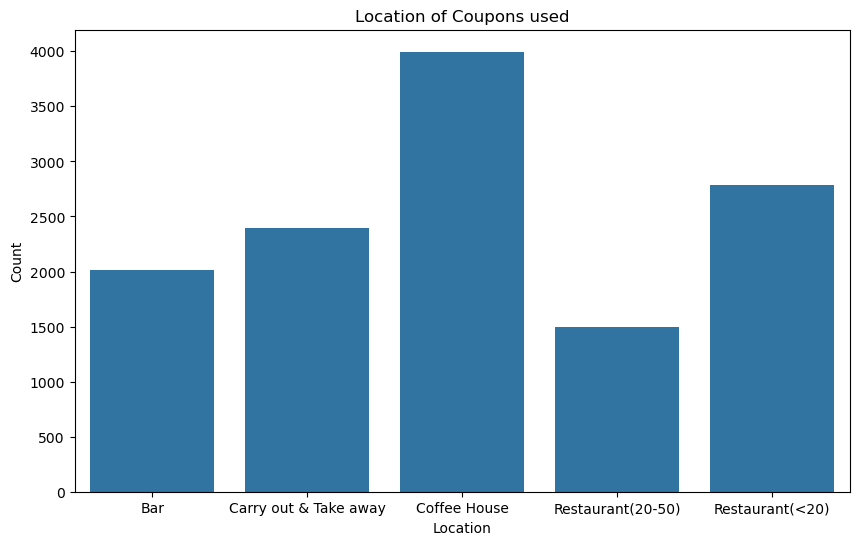

In [177]:
accepted_coupons = clean_data.groupby(['coupon', 'Y']).size().unstack()

plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)
plt.title('Location of Coupons used')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


6. Use a histogram to visualize the temperature column.

In [72]:
# unique Temperature value
temperature_counts = df['temperature'].value_counts().sort_index()


temperature_counts_df = temperature_counts.reset_index()
temperature_counts_df.columns = ['temperature', 'count']


print(temperature_counts_df)

   temperature  count
0           30   2316
1           55   3840
2           80   6528


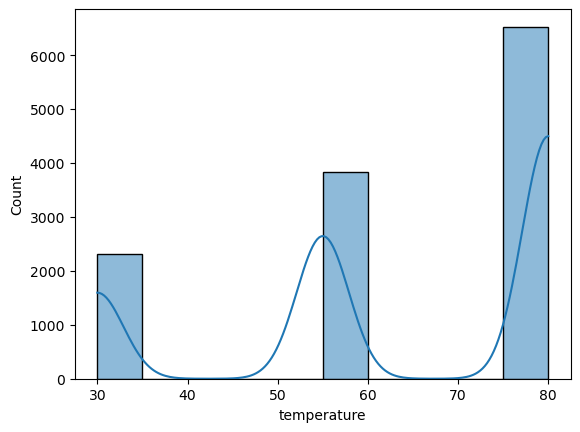

In [74]:
sns.histplot(data=df, x='temperature', bins=10, kde=True)

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [91]:
df = pd.DataFrame(data)

unique_coupons_df = df['coupon'].value_counts()
print(unique_coupons_df)


coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


In [93]:
df = pd.DataFrame(data)
bar_coupon_df = df[df['coupon'] == 'Bar']

print(bar_coupon_df)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [109]:
bar_coup_use_y = bar_coupon_df['Y'].eq(1).sum()
bar_coup_use_n = bar_coupon_df['Y'].eq(0).sum()

#print(bar_coup_use_y)
#print(bar_coup_use_n)

#percent of Y to use in bar
total_entries = len(bar_coupon_df)
percent_of_bar_y = (bar_coup_use_y / total_entries) * 100

print(f"Percentage of Bar Coupon Use: {percent_of_bar_y:.2f}%")

Percentage of Bar Coupon Use: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Who used coupons at the bar 3<= times a month: 37.061770%
Who used coupons at the bar 3> times a month: 76.884422%


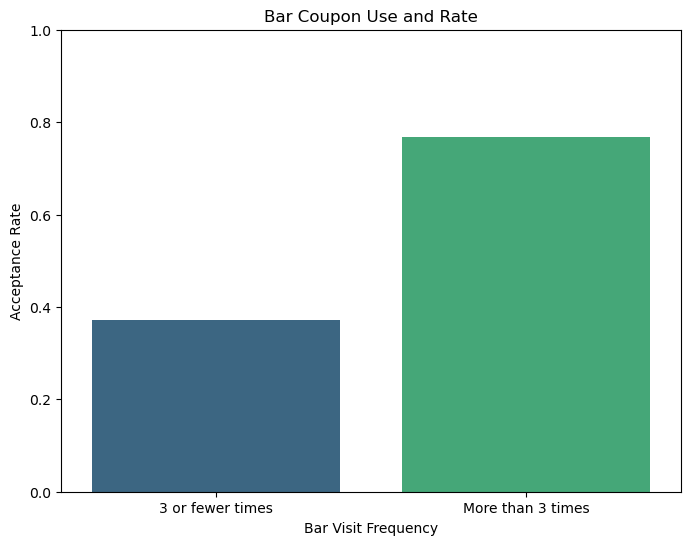

In [138]:
# breaking up the two sides, le is less than eqal to, gt is greater than
bar_le_3 = bar_coupon_df[bar_coupon_df['Bar'].isin(['never', 'less1', '1~3'])]
bar_gt_3 = bar_coupon_df[bar_coupon_df['Bar'].isin(['4~8', 'gt8'])]

# yes to use of coupon
yes_bar_le_3 = bar_le_3['Y'].mean()
yes_bar_gt_3 = bar_gt_3['Y'].mean()

#print percent
print(f"Who used coupons at the bar 3<= times a month: {yes_bar_le_3:%}")
print(f"Who used coupons at the bar 3> times a month: {yes_bar_gt_3:%}")

#bar graph to comapre
acceptance_rates = pd.DataFrame({
    'Frequency': ['3 or fewer times', 'More than 3 times'],  # Removed extra space in ' More than 3 times'
    'Acceptance Rate': [yes_bar_le_3, yes_bar_gt_3]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Frequency', y='Acceptance Rate', hue='Frequency', data=acceptance_rates, palette='viridis', dodge=False)
plt.title('Bar Coupon Use and Rate')  # Corrected spelling of 'coupon' and 'Use'
plt.ylabel('Acceptance Rate')
plt.xlabel('Bar Visit Frequency')  # Fixed 'visit' capitalization
plt.ylim(0, 1)

plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate  who go to a bar more than once a month and are over the age of 25: 68.837209%
Acceptance rate s for all other drivers: 33.459357%


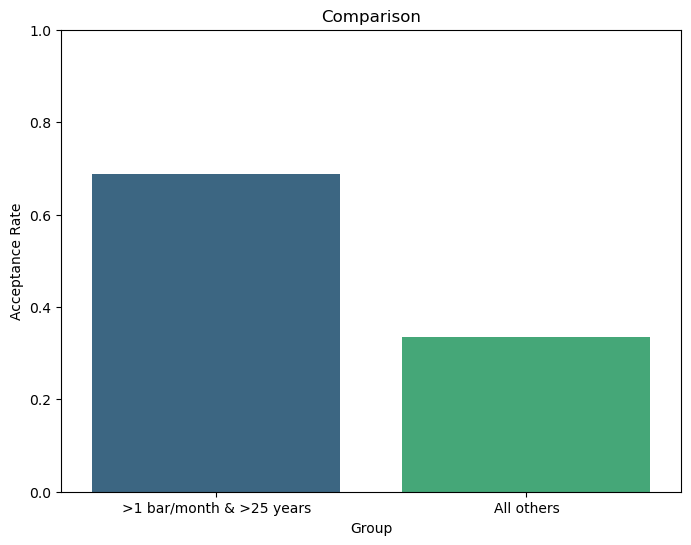

In [149]:
#add the codition of over the age of 25 to see the behavior
#go to the bar more than once over 25
subset_1 = bar_le_3 = bar_coupon_df[(bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupon_df['age'] > '25')]

#go to the bar less than once over 25
subset_2 = bar_gt_3 = bar_coupon_df[~((bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupon_df['age'] > '25'))]

#get the mean to compare
acceptance_rate_subset_1 = subset_1['Y'].mean()
acceptance_rate_subset_2 = subset_2['Y'].mean()

#print percent
print(f"Acceptance rate  who go to a bar more than once a month and are over the age of 25: {acceptance_rate_subset_1:%}")
print(f"Acceptance rate s for all other drivers: {acceptance_rate_subset_2:%}")


#bar graph to visulaize
acceptance_rates = pd.DataFrame({
    'Group': ['>1 bar/month & >25 years', 'All others'],
    'Acceptance Rate': [acceptance_rate_subset_1, acceptance_rate_subset_2]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Acceptance Rate', hue='Group', data=acceptance_rates, palette="viridis", dodge=False, legend=False)
plt.title('Comparison')
plt.ylabel('Acceptance Rate')
plt.xlabel('Group')
plt.ylim(0, 1)
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [159]:
# Go to bar more than once a month, had non-kid passengers, job that is not farming, fishing, and forestry
subset_1 = bar_coupon_df[
    (bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupon_df['passanger'] != 'Kid(s)') &
    (~bar_coupon_df['occupation'].isin(['Farming Fishing & Forestry']))  # Fixed: Added missing square brackets around list
]

# All others
subset_2 = bar_coupon_df[
    ~(
        (bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
        (bar_coupon_df['passanger'] != 'Kid(s)') &
        (~bar_coupon_df['occupation'].isin(['Farming Fishing & Forestry']))  # Fixed: Added missing square brackets around list
    )
]

#Cal acceptance rates
acceptance_rate_subset_1 = subset_1['Y'].mean()
acceptance_rate_subset_2 = subset_2['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month, with passengers that were not a kid, and had occupations other than farming, fishing, or forestry: {acceptance_rate_subset_1:.2%}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_subset_2:.2%}")

Acceptance rate for drivers who go to bars more than once a month, with passengers that were not a kid, and had occupations other than farming, fishing, or forestry: 71.32%
Acceptance rate for all other drivers: 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Acceptance Rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 62.41%
Acceptance Rate for drivers who go to bars more than once a month and are under the age of 30: 62.90%
Acceptance Rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 60.17%


C:\Users\13105\AppData\Local\Temp\ipykernel_5020\3651564533.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_bar = sns.barplot(


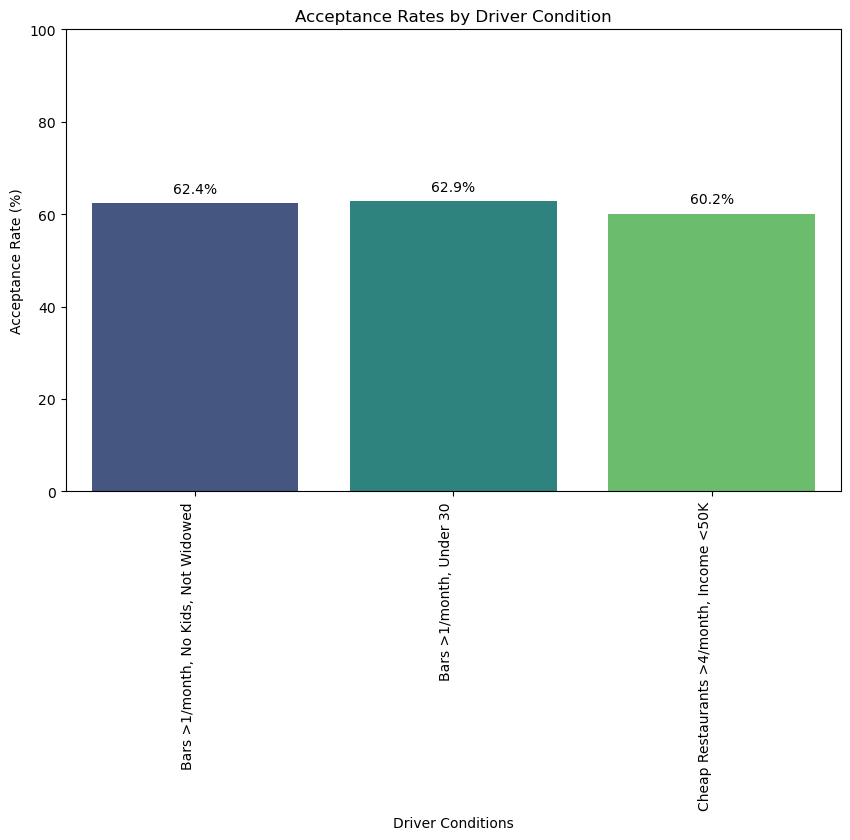

In [197]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
set_1 = (
    (clean_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (clean_data['passanger'] != 'Kid(s)') & 
    (clean_data['maritalStatus'] != 'Widowed')
)
#go to bars more than once a month and are under the age of 30
set_2 = (
    (clean_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (clean_data['age'] < '30')
)
#go to cheap restaurants more than 4 times a month and income is less than 50K.
set_3 = (
    (clean_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (clean_data['income'] < '$50000')
)

#subsets
subset_1 = clean_data[set_1]
subset_2 = clean_data[set_2]
subset_3 = clean_data[set_3]

#mean accept rate
acceptance_rate_1 = subset_1['Y'].mean() * 100
acceptance_rate_2 = subset_2['Y'].mean() * 100
acceptance_rate_3 = subset_3['Y'].mean() * 100


# Print the results
print("Acceptance Rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {:.2f}%".format(acceptance_rate_1))
print("Acceptance Rate for drivers who go to bars more than once a month and are under the age of 30: {:.2f}%".format(acceptance_rate_2))
print("Acceptance Rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {:.2f}%".format(acceptance_rate_3))


#bar graph

#data for plotting
acceptance_rates = pd.DataFrame({
    'Condition': [
        'Bars >1/month, No Kids, Not Widowed',
        'Bars >1/month, Under 30',
        'Cheap Restaurants >4/month, Income <50K'
    ],
    'Acceptance Rate (%)': [
        acceptance_rate_1,
        acceptance_rate_2,
        acceptance_rate_3
    ]
})


acceptance_rates_df = pd.DataFrame(acceptance_rates)


plt.figure(figsize=(10, 6))
sns_bar = sns.barplot(
    x='Condition', 
    y='Acceptance Rate (%)', 
    data=acceptance_rates_df,
    palette='viridis'
)

# Setting the title and labels
plt.title('Acceptance Rates by Driver Condition')
plt.xticks(rotation=90, ha='right')  
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Driver Conditions')
plt.ylim(0, 100)  

# Annotating the bars with the percentage values
for p in sns_bar.patches:
    sns_bar.annotate(format(p.get_height(), '.1f') + '%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 10), 
                      textcoords='offset points')

plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#People over the age of 25 will frequent the bar more than those who are younger. Those who have passangers and without kids will go more
#and those who have a smaller income at <50K will go more often with a coupon at the same rate as someone who goes once a month under 30.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  